In [2]:
# Preparations
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
from scipy.optimize import curve_fit
import seaborn as sns
from IPython.display import Latex
import warnings
from PrettyTable import PrettyTable
from functools import partial
from PrettyFigure import PrettyFigure
warnings.filterwarnings("ignore", module="matplotlib")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['savefig.dpi'] = 75

# plt.rcParams['figure.autolayout'] = False
# plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.unicode'] = True
plt.rcParams['font.family'] = "STIX"
plt.rcParams['text.latex.preamble'] = "\\usepackage{subdepth}, \\usepackage{type1cm}"

results = {}

sns.set(color_codes=True)

def average(data):
    return 1 / len(data) * sum(data)

def error(data, average_of_data):
    s = sum([(x - average_of_data)**2 for x in data])
    return math.sqrt(s / (len(data) * (len(data) - 1)))

def std_deviation(error_of_average, length_of_dataset):
    return error_of_average * math.sqrt(length_of_dataset)

def average_with_weights(data, weights):
    d = data
    w = weights
    return (d * w**-2).sum() / (w**-2).sum()

def error_with_weights(weights):
    w = weights
    return 1 / math.sqrt((w**-2).sum())

def wavg(group, avg_name, weight_name):
    d = group[avg_name]
    w = group[weight_name]
    return (d * w**-2).sum() / (w**-2).sum()

def werr(group, weight_name):
    return 1 / math.sqrt((group[weight_name]**-2).sum())

In [2]:
# Constants
x0 = 1.0219 # [m]
e0 = 6e-2 # [m]

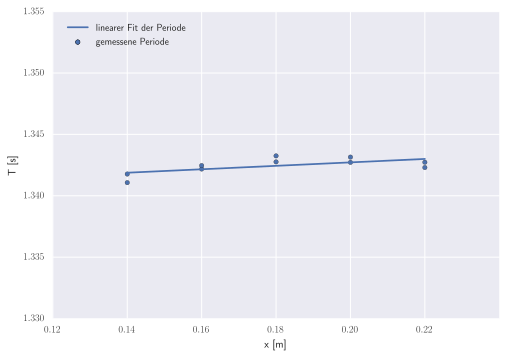

In [10]:
# Read Data
df = pd.read_csv('data/period.csv')

slope, intercept, r, p, sem = stats.linregress(df['x'], df['T'])

ax = df.plot(kind='scatter', x='x', y='T', label='gemessene Periode')
plt.plot(df['x'], df['x'] * slope + intercept, label='linearer Fit der Periode', axes=ax)
plt.xlabel('x [m]')
plt.ylabel('T [s]')
# plt.ylim([0.005, 0.007])
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)

plt.show()

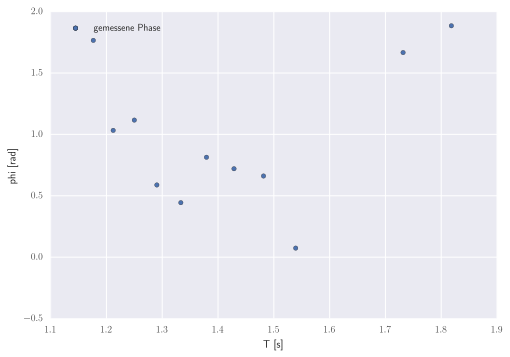

In [12]:
# Read Data
df = pd.read_csv('data/resonance.csv')

# slope, intercept, r, p, sem = stats.linregress(df['x'], df['T'])

ax = df.plot(kind='scatter', x='T', y='phi', label='gemessene Phase')
# plt.plot(df['x'], df['x'] * slope + intercept, label='linearer Fit der Periode', axes=ax)
plt.xlabel('T [s]')
plt.ylabel('phi [rad]')
# plt.ylim([0.005, 0.007])
plt.legend(bbox_to_anchor=(0.02, 0.98), loc=2, borderaxespad=0.2)

plt.show()

In [7]:
# Messwerte

data = PrettyTable(
    list(zip(dfa['x'], dfa['f'])),
    caption='Messwerte für x gemessen von Almar. Negative Werte für f kennzeichnen dass der Motor in die andere Richtung drehte.',
    entries_per_column=len(dfa['x'] / 2),
    extra_header=['x [m]', 'f [Hz]']
)
data.show()

data = PrettyTable(
    list(zip(dfn['x'], dfn['f'])),
    caption='Messwerte für x gemessen von Noah. Negative Werte für f kennzeichnen dass der Motor in die andere Richtung drehte.',
    entries_per_column=len(dfn['x'] / 2),
    extra_header=['x [m]', 'f [Hz]']
)
data.show()

x [m],f [Hz]
0.006,100
0.0061,200
0.00615,300
0.00625,400
0.006350000000000001,508
0.00645,601
0.006500000000000001,705
0.00657,804
0.0066500000000000005,904
0.00672,1002


x [m],f [Hz]
0.00585,-102
0.005770000000000001,-203
0.00568,-298
0.0056,-403
0.005520000000000001,-503
0.00543,-599
0.005350000000000001,-700
0.005260000000000001,-801
0.00519,-902
0.00512,-1001
